<a href="https://colab.research.google.com/github/nordm031/SVM_AdaBoost/blob/main/EE_8591_Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import numba
import numpy as np
import pandas as pd
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv

from time import time
from numba import cuda
from PIL import Image
from matplotlib import pyplot as plt
from IPython.display import display
from skimage.feature import hog
from skimage.color import rgb2grey
from google.colab import files

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.utils import resample

from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
# Installing External SOM Packages

!pip install minisom
!pip install sklearn_som

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=e0133f8118773942e7afe6d473da02bc4013bdc2edd50d185fe518dba619959e
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


# Problem 1

In [ ]:
# Loading Dataset and Reading Into Panda DataFrame
dataset = files.upload()

df = pd.read_excel('Pres_elec_2000_dataset_new.xlsx')

Saving Pres_elec_2000_dataset_new.xlsx to Pres_elec_2000_dataset_new.xlsx


In [ ]:
# Visualizing DataFrame
#df

In [ ]:
# Converting DataFrame to Numpy Arrays
df_features = df.loc[:, ["% Obese", "Mean NAEP"]]
df_targets = df.loc[:, "Election"]
df_states = df.loc[:, "STATE"]

X = df_features.to_numpy()
y = df_targets.to_numpy()
y_true = y.reshape(-1, 1)

states = df_states.to_numpy()
states = states.reshape(-1, 1)

0.58
[[[ 0.27138992 -0.39689477]]

 [[-0.22092408  0.31993649]]]
[[ 0.27138992 -0.39689477]
 [-0.22092408  0.31993649]]


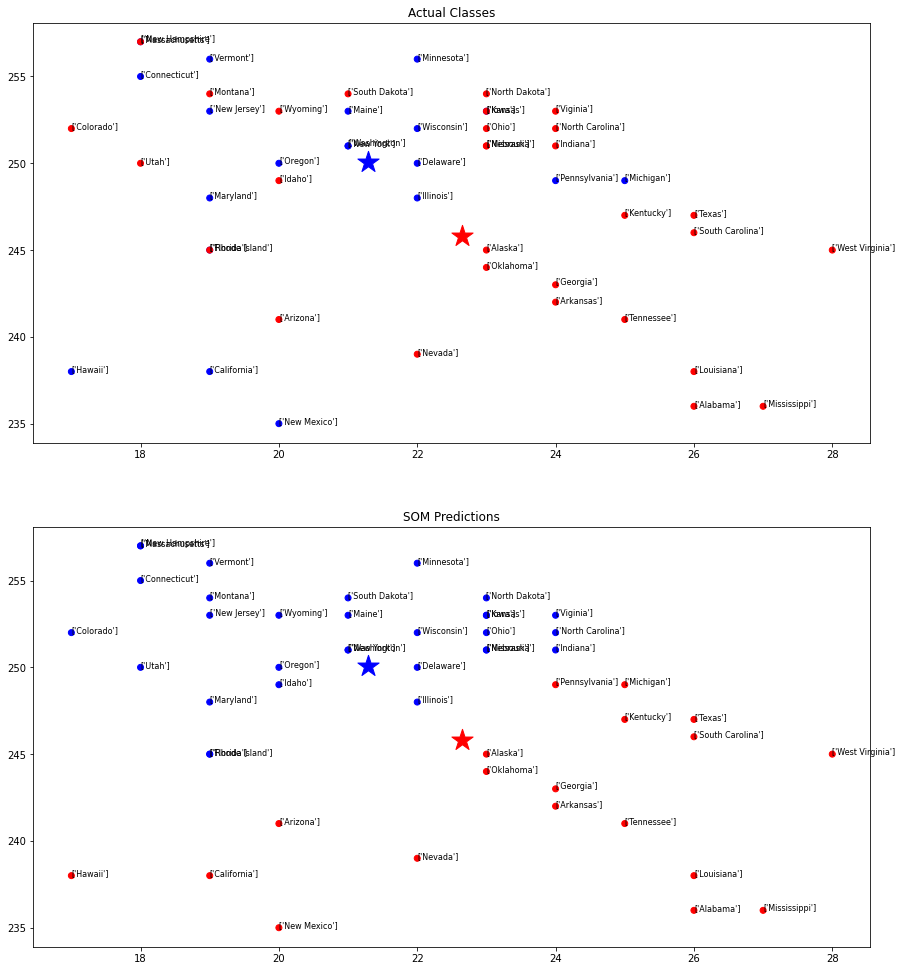

In [ ]:
# SOM

ss = StandardScaler()
X = ss.fit_transform(X)

from sklearn_som.som import SOM
from matplotlib.colors import ListedColormap

som = SOM(m=2, n=1, dim=2, random_state=0)

# Fit SOM Model to Data
som.fit(X, epochs=100, shuffle=True)

# Assign datapoints to predicted cluster
predictions = som.predict(X)

y_num_labels = np.zeros(len(y_true),)
# Generate Numerical Labels
for i in range(0, len(y_true)):
  if y_true[i] == "R":
    y_num_labels[i] = 1

print(np.sum(np.abs(y_num_labels - predictions))/50)

# Defining Cluster Centers
print(som.cluster_centers_)

cluster_1 = som.cluster_centers_[0][0]
cluster_2 = som.cluster_centers_[1][0]

clusters = np.vstack((cluster_1, cluster_2))
print(clusters)

# Inverse Transformation for Plotting
X = ss.inverse_transform(X)
clusters = ss.inverse_transform(clusters)

# Regrouping Clusters into x and y for plotting
cluster_center_x = clusters[:,0]
cluster_center_y = clusters[:,1]


# Plot Results
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,17))
x = X[:,0]
y = X[:,1]
colors = ['blue', 'red']
pred_colors = ["red", "blue"]

ax[0].scatter(x, y, c=y_num_labels, cmap=ListedColormap(colors))
ax[0].title.set_text('Actual Classes')
ax[1].scatter(x, y, c=predictions, cmap=ListedColormap(pred_colors))
ax[1].title.set_text('SOM Predictions')
plt.savefig('iris_example.png')
ax[0].scatter(cluster_center_x[0], cluster_center_y[0], c="red", s=500, marker="*")
ax[0].scatter(cluster_center_x[1], cluster_center_y[1], c="blue", s=500, marker="*")
ax[1].scatter(cluster_center_x[0], cluster_center_y[0], c="red", s=500, marker="*")
ax[1].scatter(cluster_center_x[1], cluster_center_y[1], c="blue", s=500, marker="*")

for i, txt in enumerate(states):
  ax[0].annotate(txt, (X[i,0], X[i, 1]), size=8)
  ax[1].annotate(txt, (X[i,0], X[i, 1]), size=8)


# Problem 2

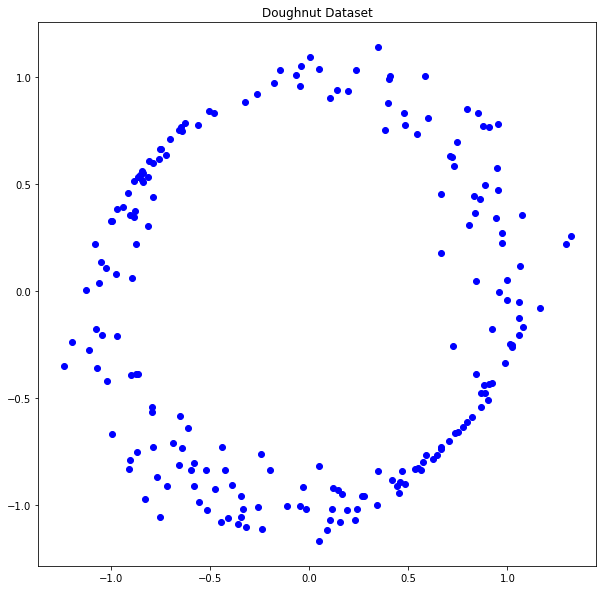

In [ ]:
# Generating doughnut dataset

z = np.random.uniform(0, 1, ((200,1)))
eps = np.random.normal(0, 0.1, ((200, 1)))

x1 = np.cos(2 * np.pi * z) + eps
x2 = np.sin(2 * np.pi * z) + eps

X = np.hstack((x1, x2))

# Plot Results
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
x = X[:,0]
y = X[:,1]
ax.scatter(x, y, c='blue')
ax.title.set_text('Doughnut Dataset')

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1149: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


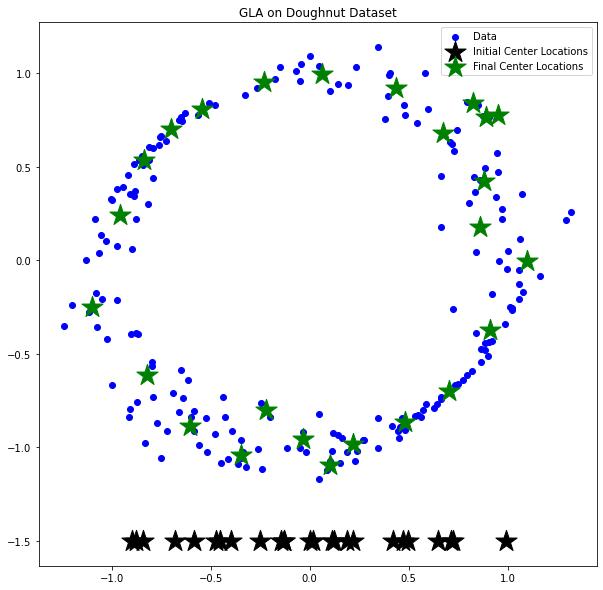

In [ ]:
# a) GLA
from sklearn.cluster import KMeans

# Number of Clusters
n_clusters = 25

# Initialize Cluster Center Locations
init_clusters_x1 = np.random.uniform(-1, 1, ((n_clusters, 1)))
init_clusters_x2 = np.zeros((n_clusters, 1)) - 1.5
init_clusters = np.hstack((init_clusters_x1, init_clusters_x2))

# GLA (KMeans) Algorithm
kmeans = KMeans(n_clusters=25, init=init_clusters, max_iter=1000).fit(X)

# Defining Cluster Centers
cluster_center_x = kmeans.cluster_centers_[:,0]
cluster_center_y = kmeans.cluster_centers_[:,1]

# Plot Results
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
x = X[:,0]
y = X[:,1]
ax.scatter(x, y, c='blue')
ax.title.set_text('GLA on Doughnut Dataset')
ax.scatter(init_clusters_x1, init_clusters_x2, c="black", s=500, marker="*")
ax.scatter(cluster_center_x, cluster_center_y, c="green", s=500, marker="*")
ax.legend(["Data", "Initial Center Locations", "Final Center Locations"])

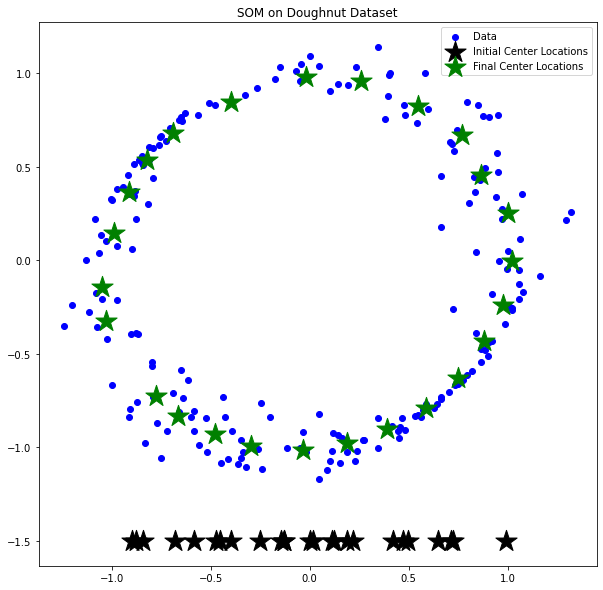

In [ ]:
from sklearn_som.som import SOM
from matplotlib.colors import ListedColormap
from som_modified import SOM_modified

# Initializing som
som = SOM_modified(m=25, n=1, dim=2, random_state=0, init_centers=init_clusters)

# Fit SOM Model to Data
som.fit(X, epochs=1000, shuffle=True)

# Defining Cluster Centers
clusters = som.cluster_centers_.reshape((-1,2))
cluster_center_x = clusters[:,0]
cluster_center_y = clusters[:,1]

# Plot Results
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
x = X[:,0]
y = X[:,1]
colors = ['blue']
ax.scatter(x, y, c='blue')
ax.title.set_text('SOM on Doughnut Dataset')
ax.scatter(init_clusters_x1, init_clusters_x2, c="black", s=500, marker="*")
ax.scatter(cluster_center_x, cluster_center_y, c="green", s=500, marker="*")
ax.legend(["Data", "Initial Center Locations", "Final Center Locations"])

# Problem 3

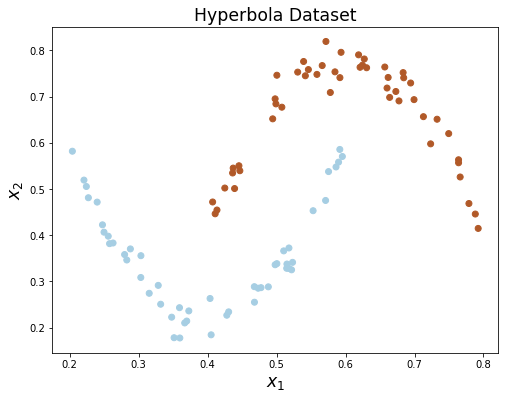

In [ ]:
# a) Hyperobolas Dataset

# Generate Hyperbola Dataset

import numpy as np
import matplotlib.pyplot as plt

__date__ = '11/29/2021'
__author__  = 'Eng Hock Lee'
__email__ = 'leex7132@umn.edu'


def cls0(Min, Max, n, s=0.225, sigma=0.025):
    """hyperbola dataset class 0 """
    x = np.random.uniform(Min, Max, (n,1))
    noise = np.random.normal(0, sigma, (n,1))
    y = ((x-0.4)*3)**2 + s + noise

    return np.concatenate((x,y), axis=1)


def cls1(Min, Max, n, s=0.225, sigma=0.025):
    """hyperbola dataset class 1 """
    x = np.random.uniform(Min, Max, (n,1))
    noise = np.random.normal(0, sigma, (n,1))
    y = 1 - ((x-0.6)*3)**2 - s + noise

    return np.concatenate((x,y), axis=1)


def hyperbola_data_generator(ntrn=100, nval=100, ntst=2000):
    """
    Function to generate hyperbola dataset (for training, validatin, and test set)

    Input argument:
        ntrn [int] = number of training sample
        nval [int] = number of validation sample
        ntst [int] = number of test sample
    """

    # train data
    class0 = cls0(0.2, 0.6, ntrn//2)
    class1 = cls1(0.4, 0.8, ntrn//2)
    trnX = np.concatenate((class0, class1), axis=0)
    trny = np.concatenate((np.ones((ntrn//2,))*-1, np.ones((ntrn//2,))))

    # validation data
    class0 = cls0(0.2, 0.6, nval//2)
    class1 = cls1(0.4, 0.8, nval//2)
    valX = np.concatenate((class0, class1), axis=0)
    valy = np.concatenate((np.ones((nval//2,))*-1, np.ones((nval//2,))))

    # test data
    class0 = cls0(0.2, 0.6, ntst//2)
    class1 = cls1(0.4, 0.8, ntst//2)
    tstX = np.concatenate((class0, class1), axis=0)
    tsty = np.concatenate((np.ones((ntst//2,))*-1, np.ones((ntst//2,))))

    return trnX, trny, valX, valy, tstX, tsty

if __name__ == '__main__':

    # generate hyperbola dataset
    trnX, trny, _, _, _, _, = hyperbola_data_generator()

    # visualize hyperbola dataset
    h = plt.figure(figsize=(8,6))
    h = plt.scatter(trnX[:,0], trnX[:,1], c=trny, cmap=plt.cm.Paired)
    h = plt.xlabel(r'$x_1$', fontsize='xx-large')
    h = plt.ylabel(r'$x_2$', fontsize='xx-large')
    h = plt.title('Hyperbola Dataset', fontsize='xx-large')
    plt.savefig('hyperbola.png')

In [ ]:
# SVM With RBF Kernal

# Number of Random Realizations
num_real = 10

# Generate Testing Dataset
_, _, _, _, X_test, y_test, = hyperbola_data_generator()

All_C_Opt = np.zeros((num_real, 1))
All_gamma_Opt = np.zeros((num_real, 1))
All_val_score = np.zeros((num_real, 1))
All_test_score= np.zeros((num_real, 1))
All_train_score = np.zeros((num_real, 1))
for k in range(0, num_real):
  # Generate Train and Validation Data
  X_train, y_train, X_val, y_val, _, _, = hyperbola_data_generator()

  C_vals = [2e-4, 2e-3, 2e-2, 2e-1, 2e0, 2e1, 2e2, 2e4, 2e5]
  gamma_vals = [8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96]
  y_train = np.ravel(y_train)
  y_val = np.ravel(y_val)
  score_temp = 0
  C_best = 0
  gamma_best = 0
  for i in range(0, len(C_vals)):
    for j in range(0, len(gamma_vals)):
      params = {'C': C_vals[i], 'gamma': gamma_vals[j]}
      clf = SVC(kernel='rbf', **params)
      clf = clf.fit(X_train, y_train)
      score = clf.score(X_val, y_val)
      if score > score_temp:
        score_temp = score
        C_best = C_vals[i]
        gamma_best = gamma_vals[j]
  All_C_Opt[k] = C_best
  All_gamma_Opt[k] = gamma_best
  clf = SVC(kernel='rbf', C=C_best, gamma=gamma_best)
  clf = clf.fit(X_train, y_train)
  All_train_score[k] = 1-clf.score(X_train, y_train)
  All_val_score[k] = 1-clf.score(X_val, y_val)
  All_test_score[k] = 1-clf.score(X_test, y_test)

np_data = np.hstack((All_C_Opt, All_gamma_Opt, All_train_score, All_val_score, All_test_score))

print("Average Test Error is: " + str(np.mean(All_test_score)))
print("Test Error Standard Deviation is: " + str(np.std(All_test_score)))

df = pd.DataFrame(data=np_data, columns=["Optimal C", "Optimal Gamma", "Training Error" ,"Validation Error", "Test Error (On Same Test Set)"])
df

Average Test Error is: 0.00784999999999999
Test Error Standard Deviation is: 0.0044104988380000865


,Optimal C,Optimal Gamma,Training Error,Validation Error,Test Error (On Same Test Set)
0,0.2000,80.0,0.01,0.00,0.0115
1,2.0000,24.0,0.00,0.02,0.0130
2,2.0000,16.0,0.01,0.00,0.0060
3,2.0000,24.0,0.00,0.00,0.0080
4,0.2000,56.0,0.01,0.00,0.0025
5,0.2000,64.0,0.00,0.00,0.0140
6,0.0002,80.0,0.02,0.00,0.0130
7,0.2000,88.0,0.00,0.00,0.0040
8,20.0000,8.0,0.00,0.00,0.0025
9,0.2000,96.0,0.01,0.00,0.0040


In [ ]:
# ADABoost
from sklearn.ensemble import AdaBoostClassifier

# Number of Random Realizations
num_real = 10

# Generate Testing Dataset
_, _, _, _, X_test, y_test, = hyperbola_data_generator()

All_num_its_Opt = np.zeros((num_real, 1))
All_val_score = np.zeros((num_real, 1))
All_test_score= np.zeros((num_real, 1))
All_train_score = np.zeros((num_real, 1))
for k in range(0, num_real):
  # Generate Train and Validation Data
  X_train, y_train, X_val, y_val, _, _, = hyperbola_data_generator()

  num_its = [16, 32, 64, 128]
  y_train = np.ravel(y_train)
  y_val = np.ravel(y_val)
  score_temp = 0
  num_its_best = 0
  for i in range(0, len(num_its)):
    params = {'n_estimators': num_its[i]}
    clf = AdaBoostClassifier(**params)
    clf = clf.fit(X_train, y_train)
    score = clf.score(X_val, y_val)
    if score > score_temp:
      score_temp = score
      num_its_best = num_its[i]
  All_num_its_Opt[k] = num_its_best
  clf = AdaBoostClassifier(n_estimators=num_its_best)
  clf = clf.fit(X_train, y_train)
  All_train_score[k] = 1-clf.score(X_train, y_train)
  All_val_score[k] = 1-clf.score(X_val, y_val)
  All_test_score[k] = 1-clf.score(X_test, y_test)

np_data = np.hstack((All_num_its_Opt, All_train_score, All_val_score, All_test_score))

print("Average Test Error is: " + str(np.mean(All_test_score)))
print("Test Error Standard Deviation is: " + str(np.std(All_test_score)))

df = pd.DataFrame(data=np_data, columns=["Optimal Number of Iterations", "Training Error" ,"Validation Error", "Test Error (On Same Test Set)"])
df

Average Test Error is: 0.01885
Test Error Standard Deviation is: 0.01592647167454238


,Optimal Number of Iterations,Training Error,Validation Error,Test Error (On Same Test Set)
0,16.0,0.0,0.01,0.0180
1,32.0,0.0,0.00,0.0155
2,64.0,0.0,0.04,0.0600
3,32.0,0.0,0.02,0.0180
4,16.0,0.0,0.00,0.0085
5,64.0,0.0,0.00,0.0340
6,16.0,0.0,0.01,0.0060
7,64.0,0.0,0.00,0.0150
8,32.0,0.0,0.00,0.0035
9,64.0,0.0,0.00,0.0100


In [ ]:
def AdaBoost_scratch(X,y, M=10, learning_rate = 1):
    #Initialization of utility variables
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]

    #Initialize the sample weights
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    #For m = 1 to M
    for m in range(M):   

        #Fit a classifier
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        #Misclassifications
        incorrect = (y_predict != y)

        #Estimator error
        estimator_error = np.mean( np.average(incorrect, weights=sample_weight, axis=0))
        
        #Boost estimator weights
        estimator_weight =  learning_rate * np.log((1. - estimator_error) / estimator_error)

        #Boost sample weights
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))

        #Save iteration values
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        


    #Convert to np array for convenience   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    #Predictions
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list

def plot_AdaBoost_scratch_boundary(estimators,estimator_weights, X, y, N = 10,ax = None ):
    
    def AdaBoost_scratch_classify(x_temp, est,est_weights ):
        '''Return classification prediction for a given point X and a previously fitted AdaBoost'''
        temp_pred = np.asarray( [ (e.predict(x_temp)).T* w for e, w in zip(est,est_weights )]  ) / est_weights.sum()
        return np.sign(temp_pred.sum(axis = 0))
    
    
    '''Utility function to plot decision boundary and scatter plot of data'''
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid( np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))


    zz = np.array( [AdaBoost_scratch_classify(np.array([xi,yi]).reshape(1,-1), estimators,estimator_weights ) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
            
    # reshape result and plot
    Z = zz.reshape(xx.shape)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5)
    ax.contour(xx, yy, Z,  2, cmap='RdBu')
    ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright)
    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')

Average Test Error is: 0.01974999999999998
Test Error Standard Deviation is: 0.01295424640803163
Accuracy =  1.0


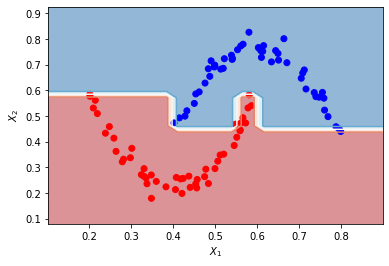

In [ ]:
# ADABoost (Plotting Decision Boundaries)
from sklearn.ensemble import AdaBoostClassifier
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

# Number of Random Realizations
num_real = 10

# Generate Testing Dataset
_, _, _, _, X_test, y_test, = hyperbola_data_generator()

All_num_its_Opt = np.zeros((num_real, 1))
All_val_score = np.zeros((num_real, 1))
All_test_score= np.zeros((num_real, 1))
All_train_score = np.zeros((num_real, 1))
for k in range(0, num_real):
  # Generate Train and Validation Data
  X_train, y_train, X_val, y_val, _, _, = hyperbola_data_generator()

  num_its = [16, 32, 64, 128]
  y_train = np.ravel(y_train)
  y_val = np.ravel(y_val)
  score_temp = 0
  num_its_best = 0
  for i in range(0, len(num_its)):
    params = {'n_estimators': num_its[i]}
    clf = AdaBoostClassifier(**params)
    clf = clf.fit(X_train, y_train)
    score = clf.score(X_val, y_val)
    if score > score_temp:
      score_temp = score
      num_its_best = num_its[i]
  All_num_its_Opt[k] = num_its_best
  clf = AdaBoostClassifier(n_estimators=num_its_best)
  clf = clf.fit(X_train, y_train)
  All_train_score[k] = 1-clf.score(X_train, y_train)
  All_val_score[k] = 1-clf.score(X_val, y_val)
  All_test_score[k] = 1-clf.score(X_test, y_test)

np_data = np.hstack((All_num_its_Opt, All_train_score, All_val_score, All_test_score))

print("Average Test Error is: " + str(np.mean(All_test_score)))
print("Test Error Standard Deviation is: " + str(np.std(All_test_score)))

df = pd.DataFrame(data=np_data, columns=["Optimal Number of Iterations", "Training Error" ,"Validation Error", "Test Error (On Same Test Set)"])
df

clf = AdaBoostClassifier(n_estimators=32)
clf.fit(X_train, y_train)

estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X_train,y_train, M=32, learning_rate = 1)
plot_AdaBoost_scratch_boundary(estimator_list, estimator_weight_list, X_train, y_train, N=32)

Accuracy =  1.0


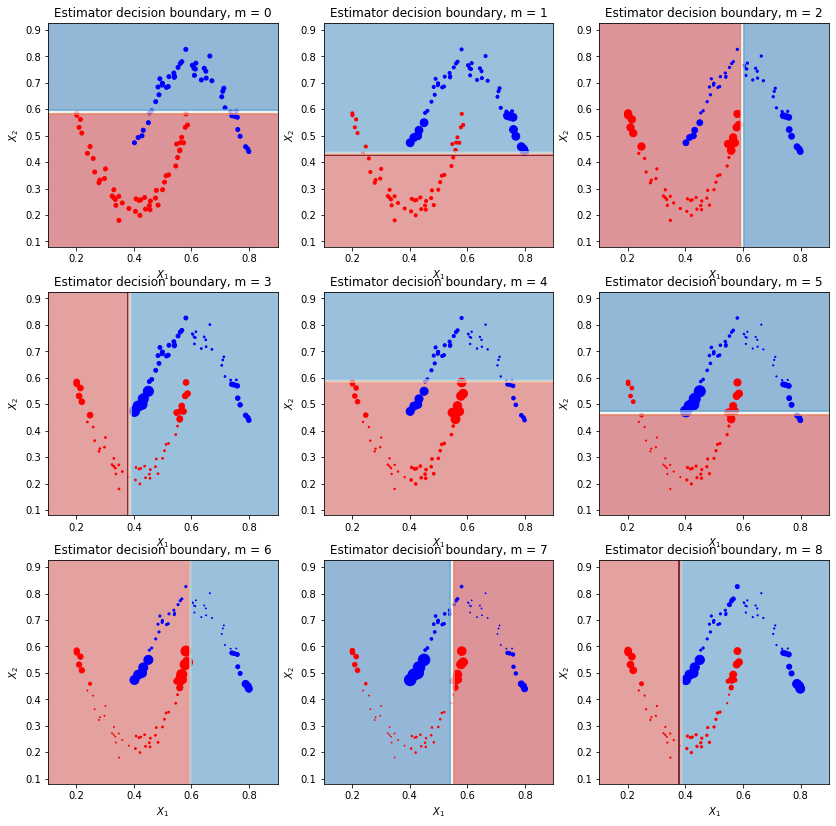

In [ ]:
# Plotting Decision Boundaries of Weak Classifiers
estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X_train,y_train, M=10, learning_rate = 1)

fig = plt.figure(figsize = (14,14))
for m in range(0,9):
    fig.add_subplot(3,3,m+1)
    s_weights = (sample_weight_list[m,:] / sample_weight_list[m,:].sum() ) * 40
    plot_decision_boundary(estimator_list[m], X_train,y_train,N = 50, scatter_weights =s_weights )
    plt.title('Estimator decision boundary, m = {}'.format(m))

In [ ]:
#b) Redoing data organization
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow import keras

# Loading Handwritten Digits Dataset
mnist = tf.keras.datasets.mnist

# Separating Into Training and Testing Sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Collecting 5 and 8 only
train_filter = np.where((y_train == 5) | (y_train == 8))
test_filter = np.where((y_test == 5) | (y_test == 8))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Relabeling class labels to 0 and 1
#y_train[y_train == 5] = 0
#y_train[y_train == 8] = 1
#y_test[y_test == 5] = 0
#y_test[y_test == 8] = 1

# Flattening data into 2D
def Threed_to_Twod(x):
  nsamples, nx1, nx2 = x.shape
  x_new= x.reshape((nsamples, nx1*nx2))
  return x_new

x_train = Threed_to_Twod(x_train)
x_test = Threed_to_Twod(x_test)

# Scaling Data
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# SVM With RBF Kernal (Digits)

# Number of Random Realizations
num_real = 10

All_C_Opt = np.zeros((num_real, 1))
All_gamma_Opt = np.zeros((num_real, 1))
All_val_score = np.zeros((num_real, 1))
All_test_score= np.zeros((num_real, 1))
All_train_score = np.zeros((num_real, 1))
for k in range(0, num_real):
  # Generate Train and Validation Data
  num_samples = 100
  X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, train_size=100, test_size=100)

  C_vals = [10e-2, 10e-1, 10e0, 10e1]
  gamma_vals = [2e-8, 2e-7, 2e-6, 2e-5, 2e-4, 2e-3, 2e-2, 2e-1, 2e0]
  #Y_train = np.ravel(Y_train)
  #Y_val = np.ravel(Y_val)
  score_temp = 0
  C_best = 0
  gamma_best = 0
  for i in range(0, len(C_vals)):
    for j in range(0, len(gamma_vals)):
      params = {'C': C_vals[i], 'gamma': gamma_vals[j]}
      clf = SVC(kernel='rbf', **params)
      clf = clf.fit(X_train, Y_train)
      score = clf.score(X_val, Y_val)
      if score > score_temp:
        score_temp = score
        C_best = C_vals[i]
        gamma_best = gamma_vals[j]
  All_C_Opt[k] = C_best
  All_gamma_Opt[k] = gamma_best
  clf = SVC(kernel='rbf', C=C_best, gamma=gamma_best)
  clf = clf.fit(X_train, Y_train)
  All_train_score[k] = 1-clf.score(X_train, Y_train)
  All_val_score[k] = 1-clf.score(X_val, Y_val)
  All_test_score[k] = 1-clf.score(x_test, y_test)

np_data = np.hstack((All_C_Opt, All_gamma_Opt, All_train_score, All_val_score, All_test_score))

print("Average Test Error is: " + str(np.mean(All_test_score)))
print("Test Error Standard Deviation is: " + str(np.std(All_test_score)))

df = pd.DataFrame(data=np_data, columns=["Optimal C", "Optimal Gamma", "Training Error" ,"Validation Error", "Test Error (On Same Test Set)"])
df

Average Test Error is: 0.07422293676312967
Test Error Standard Deviation is: 0.00893935011661966


,Optimal C,Optimal Gamma,Training Error,Validation Error,Test Error (On Same Test Set)
0,1.0,0.0020,0.00,0.04,0.063237
1,10.0,0.0020,0.00,0.02,0.058950
2,1.0,0.0020,0.01,0.05,0.069132
3,10.0,0.0002,0.01,0.07,0.076635
4,100.0,0.0002,0.00,0.06,0.069132
5,10.0,0.0020,0.00,0.07,0.074491
6,1.0,0.0020,0.00,0.08,0.090568
7,10.0,0.0020,0.00,0.04,0.078242
8,100.0,0.0002,0.00,0.03,0.083601
9,10.0,0.0002,0.02,0.04,0.078242


In [ ]:
# ADABoost
from sklearn.ensemble import AdaBoostClassifier

# Number of Random Realizations
num_real = 10

All_num_its_Opt = np.zeros((num_real, 1))
All_val_score = np.zeros((num_real, 1))
All_test_score= np.zeros((num_real, 1))
All_train_score = np.zeros((num_real, 1))
for k in range(0, num_real):
  # Generate Train and Validation Data
  X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, train_size=100, test_size=100)

  num_its = [16, 32, 64, 128]
  Y_train = np.ravel(Y_train)
  Y_val = np.ravel(Y_val)
  score_temp = 0
  num_its_best = 0
  for i in range(0, len(num_its)):
    params = {'n_estimators': num_its[i]}
    clf = AdaBoostClassifier(**params)
    clf = clf.fit(X_train, Y_train)
    score = clf.score(X_val, Y_val)
    if score > score_temp:
      score_temp = score
      num_its_best = num_its[i]
  All_num_its_Opt[k] = num_its_best
  clf = AdaBoostClassifier(n_estimators=num_its_best)
  clf = clf.fit(X_train, Y_train)
  All_train_score[k] = 1-clf.score(X_train, Y_train)
  All_val_score[k] = 1-clf.score(X_val, Y_val)
  All_test_score[k] = 1-clf.score(x_test, y_test)

np_data = np.hstack((All_num_its_Opt, All_train_score, All_val_score, All_test_score))

print("Average Test Error is: " + str(np.mean(All_test_score)))
print("Test Error Standard Deviation is: " + str(np.std(All_test_score)))

df = pd.DataFrame(data=np_data, columns=["Optimal Number of Iterations", "Training Error" ,"Validation Error", "Test Error (On Same Test Set)"])
df

Average Test Error is: 0.11334405144694534
Test Error Standard Deviation is: 0.02138021889964774


,Optimal Number of Iterations,Training Error,Validation Error,Test Error (On Same Test Set)
0,32.0,0.0,0.04,0.098607
1,128.0,0.0,0.02,0.090032
2,32.0,0.0,0.10,0.101822
3,64.0,0.0,0.12,0.107181
4,32.0,0.0,0.12,0.165595
5,128.0,0.0,0.08,0.094855
6,32.0,0.0,0.07,0.134512
7,128.0,0.0,0.10,0.115756
8,16.0,0.0,0.08,0.120043
9,128.0,0.0,0.07,0.105038
